<a href="https://colab.research.google.com/github/balajibetadur/Fast-Marching/blob/main/IITB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 419kB 3.7MB/s 
  Created wheel for scikit-fmm: filename=scikit_fmm-2019.1.30-cp36-cp36m-linux_x86_64.whl size=167688 sha256=3de1231aed273900a953e3b68acd6b57b51f17fa7d244552b8f3fce288c85110
  Stored in directory: /root/.cache/pip/wheels/68/5a/47/26e44146c9e341c2c9afed8559cfff05bb2fb87f7a61fc3988
Successfully built scikit-fmm


In [ ]:
!pip install scikit-fmm
import numpy as np
# import pylab as plt
import skfmm
import math
from math import sqrt, pi
from numpy import sin, cos, exp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time 

In [ ]:
time_start = time.clock()
start_time = time.time()

img = cv2.imread('/content/map4.bmp')


In [ ]:
type(img)

numpy.ndarray

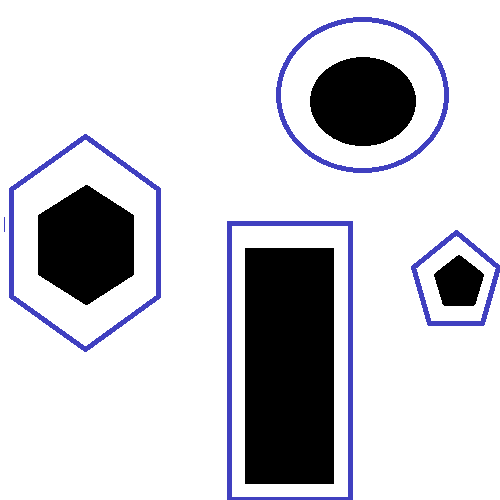

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:

rows, cols, chamels = img.shape
roi = img[0:rows, 0:cols]

In [ ]:
print(rows,cols,rows)

500 500 500


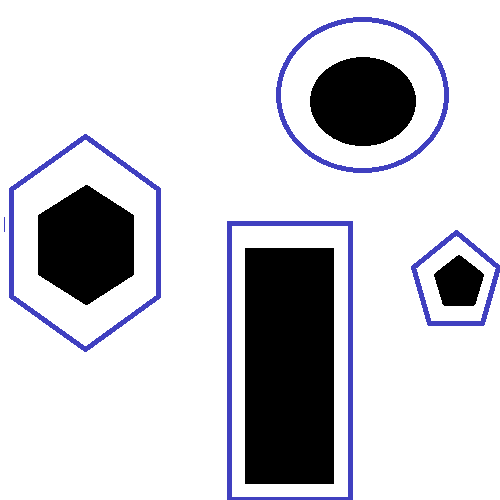

In [ ]:
cv2_imshow(roi)

In [ ]:

img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print img2gray
ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY_INV)

In [ ]:
print(ret)

254.0


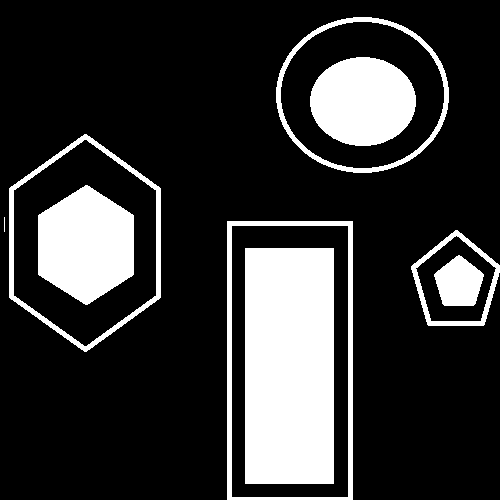

In [ ]:
cv2_imshow(mask)

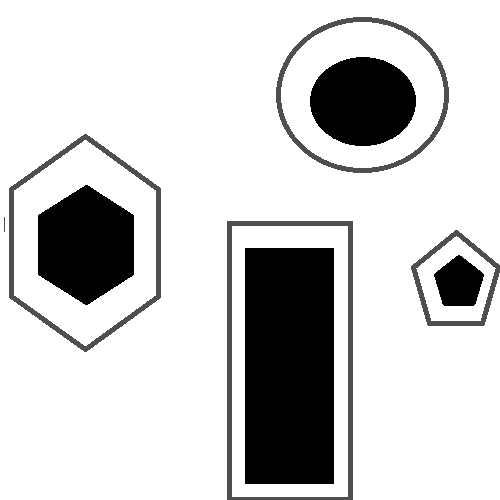

In [ ]:
cv2_imshow(img2gray)

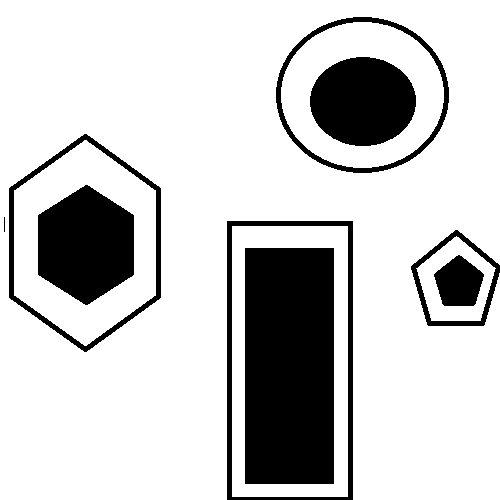

In [ ]:
mask_inv = cv2.bitwise_not(mask)
cv2_imshow(mask_inv)

In [ ]:
img_fg = cv2.bitwise_and(img, img, mask=mask)
img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)


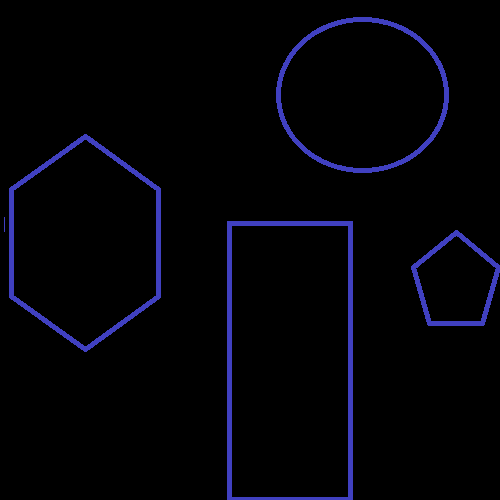

In [ ]:
cv2_imshow(img_fg)

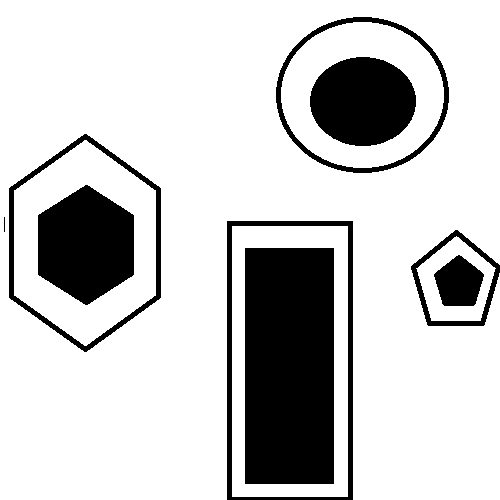

In [ ]:
cv2_imshow(img_bg)

In [ ]:
dst = cv2.add(img_bg, img_fg)
img[0:rows, 0:cols] = dst

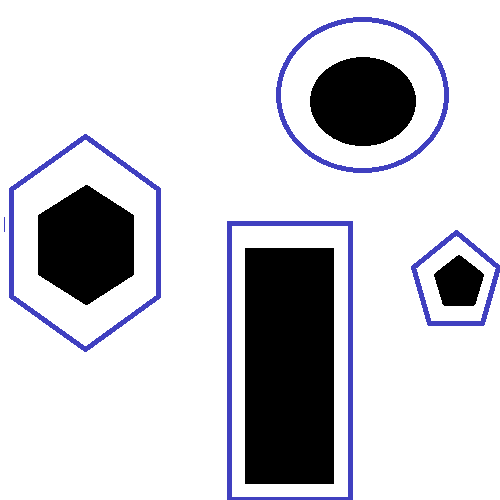

In [ ]:
cv2_imshow(dst)

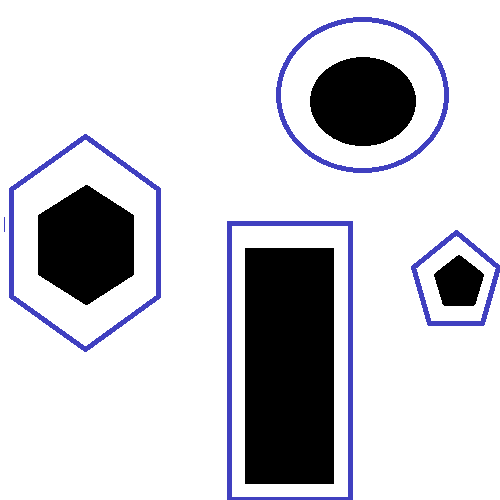

In [ ]:
cv2_imshow(img)

In [ ]:
X, Y = np.meshgrid(np.linspace(0, 499, 500), np.linspace(0, 499, 500))
phi = -1 * np.ones_like(X)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


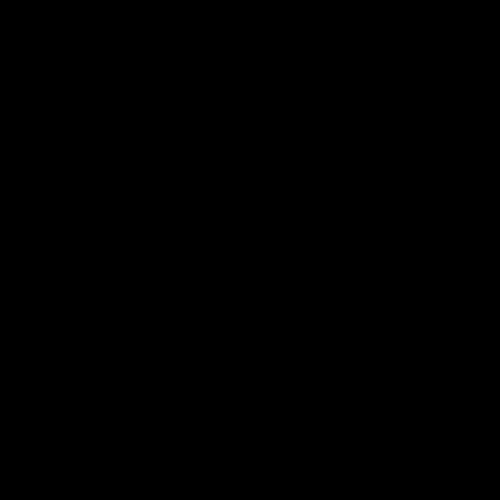

In [ ]:
print(phi)
cv2_imshow(phi)

In [ ]:
print(X,Y)

[[  0.   1.   2. ... 497. 498. 499.]
 [  0.   1.   2. ... 497. 498. 499.]
 [  0.   1.   2. ... 497. 498. 499.]
 ...
 [  0.   1.   2. ... 497. 498. 499.]
 [  0.   1.   2. ... 497. 498. 499.]
 [  0.   1.   2. ... 497. 498. 499.]] [[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [497. 497. 497. ... 497. 497. 497.]
 [498. 498. 498. ... 498. 498. 498.]
 [499. 499. 499. ... 499. 499. 499.]]


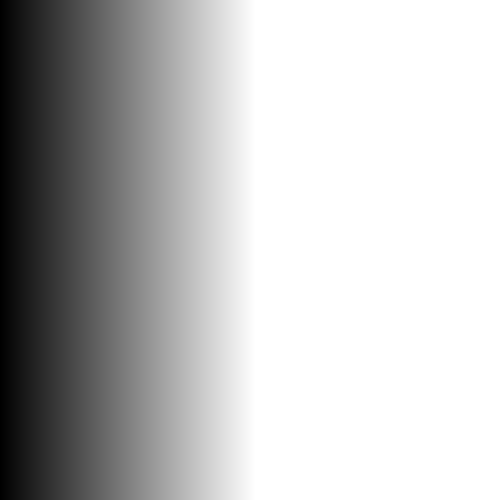

In [ ]:
cv2_imshow(X)

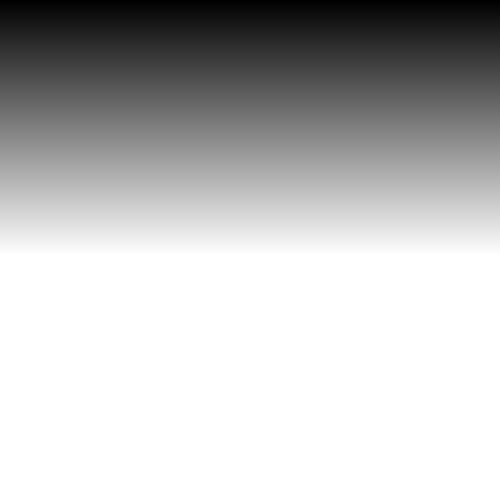

In [ ]:
cv2_imshow(Y)

In [ ]:

#red
Tx = 23
Ty = 438
#blue
ix = xpos = 314
iy = ypos = 16

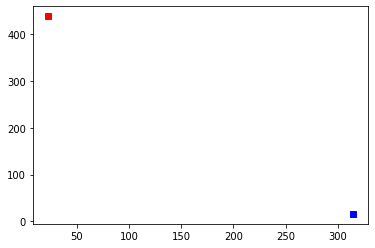

In [ ]:
plt.plot(xpos, ypos, 'bs')
plt.plot(Tx, Ty, 'rs')

[[192373. 192328. 192285. ... 416520. 417469. 418420.]
 [191498. 191453. 191410. ... 415645. 416594. 417545.]
 [190625. 190580. 190537. ... 414772. 415721. 416672.]
 ...
 [  4010.   3965.   3922. ... 228157. 229106. 230057.]
 [  4129.   4084.   4041. ... 228276. 229225. 230176.]
 [  4250.   4205.   4162. ... 228397. 229346. 230297.]]


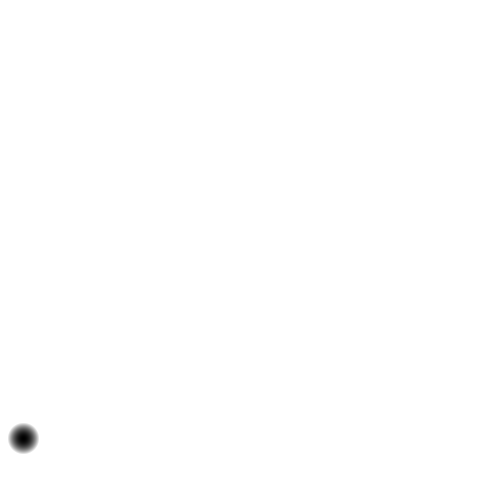

In [ ]:
phi = (X - Tx) ** 2 + (Y - Ty) ** 2
print(phi)
cv2_imshow(phi)

In [ ]:
Y

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [497., 497., 497., ..., 497., 497., 497.],
       [498., 498., 498., ..., 498., 498., 498.],
       [499., 499., 499., ..., 499., 499., 499.]])

In [ ]:
speed = np.ones_like(X)
speed[abs(Y) > 0] = 1

In [ ]:
speed

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

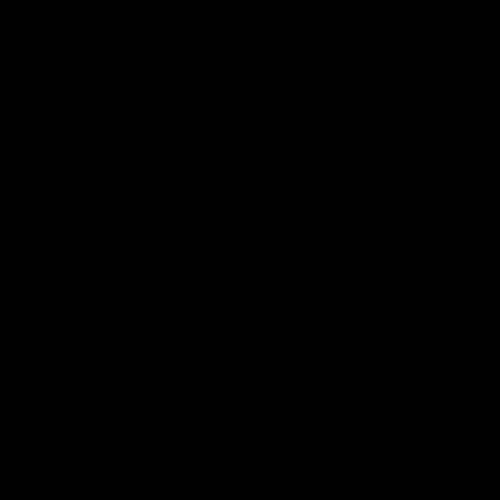

In [ ]:
cv2_imshow(speed)

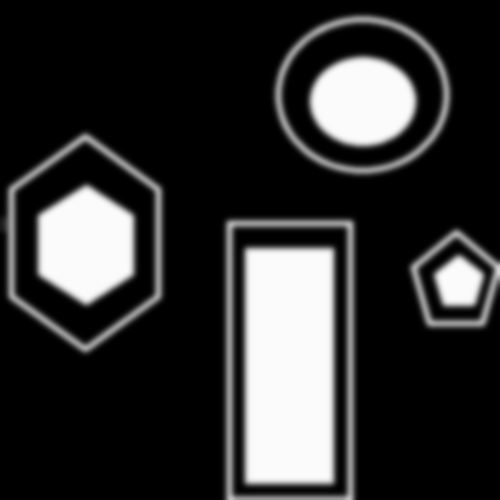

In [ ]:
blur = cv2.GaussianBlur(mask, (499, 499), 3)
cv2_imshow(blur)

[[192373.0 192328.0 192285.0 ... 416520.0 417469.0 418420.0]
 [191498.0 191453.0 191410.0 ... 415645.0 416594.0 417545.0]
 [190625.0 190580.0 190537.0 ... 414772.0 415721.0 416672.0]
 ...
 [4010.0 3965.0 3922.0 ... 228157.0 229106.0 230057.0]
 [4129.0 4084.0 4041.0 ... 228276.0 229225.0 230176.0]
 [4250.0 4205.0 4162.0 ... 228397.0 229346.0 230297.0]]


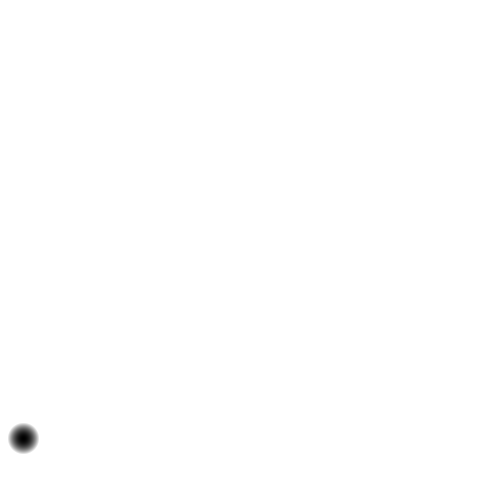

In [ ]:
phi = np.ma.MaskedArray(phi, blur)
print(phi)
cv2_imshow(phi)

In [ ]:
t = skfmm.travel_time(phi, speed, dx=1e-2)
t

masked_array(
  data=[[5.6697667035072925, 5.663003799548493, 5.656263166099096, ...,
         6.931106382917574, 6.934442383403972, 6.937845713306064],
        [5.662420034640341, 5.655636739949371, 5.648875663685921, ...,
         6.921671645875905, 6.9250317560141825, 6.928459467267611],
        [5.65509225326213, 5.648288503711281, 5.64150691844898, ...,
         6.912245418797522, 6.915629935058463, 6.919082323128047],
        ...,
        [0.6354190106088674, 0.6318309439884073, 0.6283783704637405, ...,
         7.554111111534651, 7.558504381358826, 7.5629249156272],
        [0.644736656980084, 0.6411996249981798, 0.6377966112067234, ...,
         7.563104139165867, 7.567484282565133, 7.571891387119406],
        [0.6540740593534784, 0.6505867022787727, 0.6472319089022855, ...,
         7.572103430062793, 7.576470620712642, 7.580864500507453]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, F

In [ ]:
# for i in range(len(t)):
#     cv2_imshow(t[i])

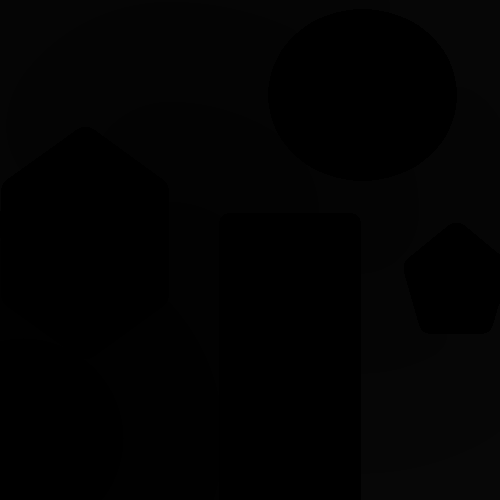

In [ ]:
temp = np.array(t)
cv2_imshow(np.array(t))

In [ ]:

x0 = [img.shape[0]//2, img.shape[1]//2]

img[img.shape[0]//2, img.shape[1]//2] = 0
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY_INV)
# u = img2gray.copy()
u = temp.copy()
[nodex, nodey] = u.shape
h = 6
Order_j = [range(nodex),range(nodex),range(nodex)[::-1],range(nodex)[::-1]]
Order_i = [range(nodey),range(nodey)[::-1],range(nodey),range(nodey)[::-1]]

In [ ]:
n = 50
import numpy as np
u = np.zeros((n,n)) + np.inf
u[45,5] = 0
[nodex, nodey] = u.shape
h = 1
Order_j = [range(nodex),range(nodex),range(nodex)[::-1],range(nodex)[::-1]]
Order_i = [range(nodey),range(nodey)[::-1],range(nodey),range(nodey)[::-1]]
import matplotlib.pyplot as plt


In [ ]:
import math
import numpy as np
for O in range(0,4):# different sweeping order
    for i in Order_i[O]:    #y
        for j in Order_j[O]:#column
            # The Gauss Seidel loop
            # Only carry it out if the node hasn't been set initially
            if not (np.isnan(u[i, j])):  #if pixel value is present
            
                if ((i > 0) and (i < nodey - 1)):  #if not on boundary
                    uymin = min(u[i - 1, j], u[i + 1, j])
                elif (i == 0):
                    uymin = u[2, j]
                else:
                    uymin = u[nodey - 1, j]
                
                if ((j > 0) and (j < nodex - 1)):
                    uxmin = min(u[i, j - 1], u[i, j + 1])
                elif (j == 0):
                    uxmin = u[i, 2]
                else:
                    uxmin = u[i, nodex - 1]
                
                if (abs(uxmin - uymin) >= h):
                    ubar = min(uxmin, uymin) + h
                else:
                    ubar = (uxmin + uymin + math.sqrt(2 * h ** 2 - (uxmin - uymin) ** 2)) / 2
                
                u[i, j] = min(u[i, j], ubar)
                    #if
 
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


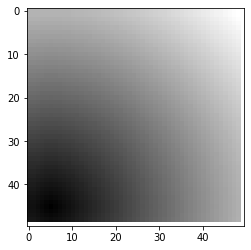

In [ ]:
import matplotlib.pyplot as plt

import numpy as np 
 # sample 2D array 
plt.imshow(u, cmap="gray") 
# plt.contour(X, Y, t,50)
# plt.plot(xpos, ypos, 'bs')
# plt.plot(Tx, Ty, 'rs')
# plt.colorbar()
plt.show() 

In [ ]:
u[45,5]

0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


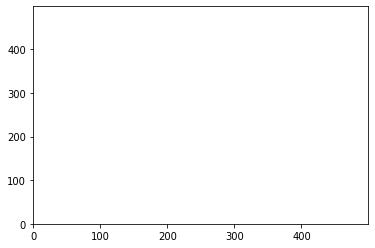

In [ ]:
plt.contour(X, Y, phi, [0], linewidths=(1), colors='black')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


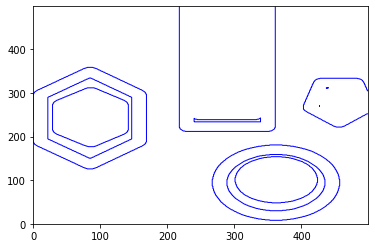

In [ ]:
plt.contour(X, Y, phi.mask, [0], linewidths=(1), colors='blue')

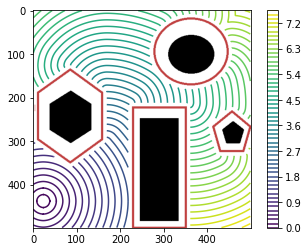

In [ ]:
plt.contour(X, Y, t,50)
plt.colorbar()
plt.imshow(img)

In [ ]:
def dist(x, y):
    distance = u[x][y]
    return distance

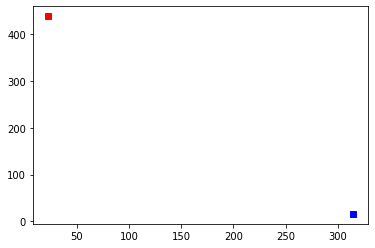

In [ ]:

m = 0
n = 0
distance = sqrt((xpos - Tx) ** 2 + (ypos - Ty) ** 2)
position = (xpos, ypos)
plt.plot(xpos, ypos, 'bs')
plt.plot(Tx, Ty, 'rs')

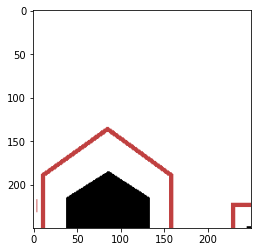

In [ ]:
plt.imshow(temp1)

In [ ]:
img2 = img.copy()

In [ ]:
img2 = img2[:250]
temp1 = []
for i in range(250):
    temp = []
    for j in range(250):
        temp.append(img2[i][j]) 
    temp1.append(temp)



Streaming output truncated to the last 5000 lines.
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 28)
distance: 495.9243893982227
position : (302, 2

KeyboardInterrupt: ignored

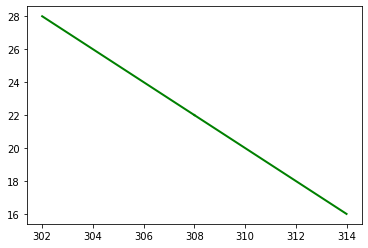

In [ ]:
# fast marching
path = [[], []]
pathlength =0
while distance > 10:

    value = []
    index = []
    position = (xpos, ypos)

    for M in range(-6, 7, 6):
        for N in range(-6, 7, 6):
            m = xpos + M
            n = ypos + N
            P = dist(n, m)
            if P > 0:
                value.append(P)
            else:
                value.append(10)
            # plt.plot(m,n,'ro')
            index.append((M, N))

    # path[0].append(m)
    # path[1].append(n)
    print('position :', position)

    # plt.plot(xpos,ypos,'go')
    N = np.argmin(value)


    print('distance:', distance)
    # xindex = N / 6
    # yindex = N % 6

    m = xpos
    n = ypos

    xpos = xpos + index[N][0]
    ypos = ypos + index[N][1]

    line, = plt.plot([xpos, m], [ypos, n], 'green', lw=2)
    distance = sqrt((xpos - Tx) ** 2 + (ypos - Ty) ** 2)
    # print(xindex, yindex)
    pathlength+=sqrt((xpos - m) ** 2 + (ypos - n) ** 2)
'''
time_elapsed = (time.clock() - time_start)
print
'timeelapsed', time_elapsed
print("--- %s seconds ---" % (time.time() - start_time))

print
path[0], path[1]'''
print ('pathlength :',pathlength)
plt.title(pathlength)
plt.gca().invert_yaxis()
plt.show()
cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.show()
